# Stochastic approach

Use stochastic output instead deterministic output

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X = np.array([1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 6]).reshape((-1, 1))
y = np.array([1, 1.5, 1.2, 3, 4, 4, 5, 6, 7, 8, 9]).reshape((-1, 1))

X.shape, y.shape

((11, 1), (11, 1))

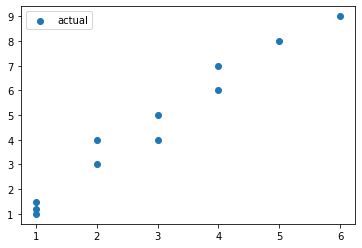

In [3]:
plt.scatter(X, y, label="actual")
plt.legend()

In [4]:
class StochasticNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.hiddens = tf.keras.Sequential([tf.keras.layers.Dense(4)] * 3)
        self.mu = tf.keras.layers.Dense(1)
        self.rho = tf.keras.layers.Dense(1) 
        
    def parameterize(self, mu, rho):
        eps = tf.random.normal(tf.shape(mu), 0, 1)
        sigma = tf.math.softplus(rho)
        
        return mu + sigma * eps
        
    def call(self, x):
        x = self.hiddens(x)
        mu = self.mu(x)
        rho = self.rho(x)
        out = self.parameterize(mu, rho)
        return out

In [5]:
model = StochasticNN()

In [6]:
opt = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss="MSE", optimizer=opt)

In [7]:
model.fit(X, y, batch_size=10, epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 2ms/step - loss: 42.6246
Epoch 2/50
2/2 [==============================] - 0s 3ms/step - loss: 45.7339
Epoch 3/50
2/2 [==============================] - 0s 2ms/step - loss: 32.8458
Epoch 4/50
2/2 [==============================] - 0s 2ms/step - loss: 33.0599
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 29.8075
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: 25.0131
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: 19.9596
Epoch 8/50
2/2 [==============================] - 0s 2ms/step - loss: 22.2054
Epoch 9/50
2/2 [==============================] - 0s 6ms/step - loss: 14.8131
Epoch 10/50
2/2 [==============================] - 0s 3ms/step - loss: 15.8835
Epoch 11/50
2/2 [==============================] - 0s 2ms/step - loss: 10.8436
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 12.4892
Epoch 13/50
2/2 [==============================] - 0s 2ms/ste

In [8]:
pred = np.stack([model(X).numpy() for _ in range(100)])

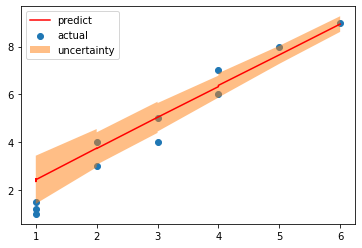

In [9]:
plt.scatter(X, y, label="actual")
plt.plot(X, pred.mean(axis=0), color='red', label="predict")
plt.fill_between(X.flatten(), 
                 (pred.mean(axis=0) + 2 * pred.std(axis=0)).flatten(), 
                 (pred.mean(axis=0) - 2 * pred.std(axis=0)).flatten(), 
                 alpha=0.5, label='uncertainty')
plt.legend()